# Creating a New Movie Studio: Exploring Movie Data for Insights.
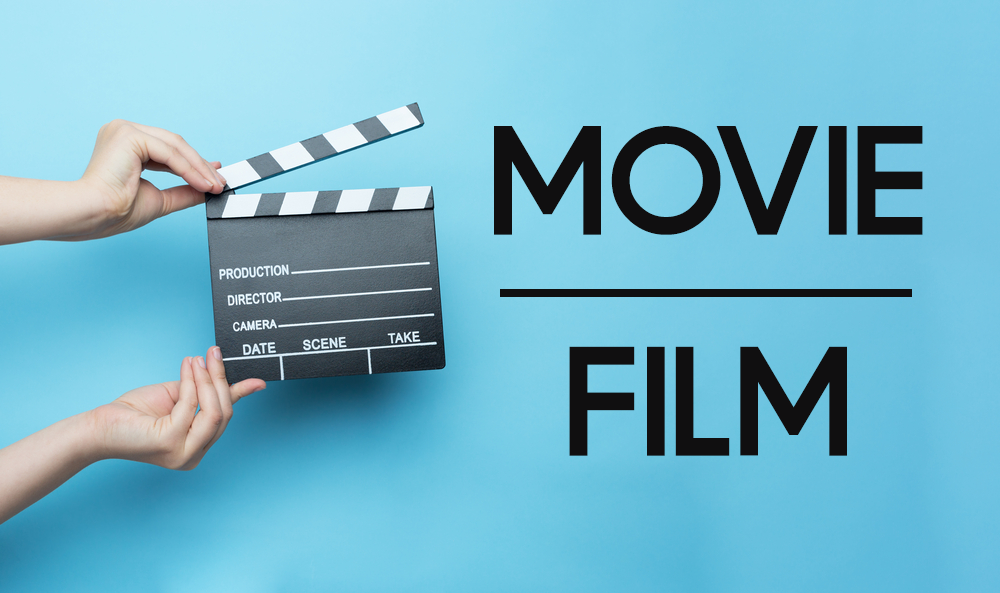

# Project Title

**Author:** Dominic Njue Mugo
***

## Overview

This project analyzes the current trends in the film industry and identify the types of films that are performing well at the box office with a view to creatin a new Movie studio. The exploratory data analysis shows that for successful investment, the movie studio will need to.....

## Business Problem

Microsoft sees all the big companies creating original video content and they want to get in on the fun. They have decided to create a new movie studio, but they don’t know anything about creating movies. To inform their decision, exploratory data analysis may be useful to understand what types of films are currently doing the best at the box office. The findings can be translated into actionable insights that the head of Microsoft's new movie studio can use to help decide what type of films to create. Using movie reviews data from IMDB, Box Office Mojo and Rotten tomatoes, I explore patterns, trends and colleration between movie genres, ratings and the total gross they make to offer insights into what kind of movies Microsoft Studios can invest in.  
***

## Data Understanding

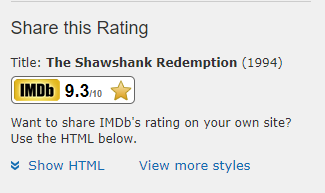

The IMDB top 1000 website provide information on the top best movies in the box office based on user rating anf a metascore. The rating ranks from 1-10, where 10 indicates a very high user rating. The movies are also categorised into different genres, such as crime, drama etc. The data also contains the gross collection made from the movie's release.
***

# Data Acquistion

The data is scraped from the IMDP top 1000 movies website. Link {https://www.imdb.com/search/title/?groups=top_1000&sort=user_rating,desc&count=100&start}. The data is downloaded to a csv file which is used in subsequent analysis. The code for scraping is commented out to limit run time.

In [ ]:
#Download data from IMDB website using beautiful soup
#importing the libraries needed 
# import pandas as pd
# import numpy as np
# import requests
# from bs4 import BeautifulSoup
# from time import sleep
# from random import randint

# # Include headers in the request
# headers = {"Accept-Language": "en-US,en;q=0.5"}

# # Declare empty lists to append the data

# movie_name = []
# year = []
# time=[]
# rating=[]
# metascore =[]
# genre = []
# votes = []
# gross = []
# description = []


# # Create an array of values to pass to the web pages
# pages = np.arange(1,1000,100)

# # Loop through each of the pages and through each of the element and strip the required data
# for page in pages:
#     page = requests.get("https://www.imdb.com/search/title/?groups=top_1000&sort=user_rating,desc&count=100&start="+str(page)+"&ref_=adv_nxt")
#     soup = BeautifulSoup(page.text, 'html.parser')
#     movie_data = soup.findAll('div', attrs = {'class': 'lister-item mode-advanced'})
#     sleep(randint(2,8))
#     for element in movie_data:
#         name = element.h3.a.text
#         movie_name.append(name)
        
#         year_of_release = element.h3.find('span', class_ = "lister-item-year text-muted unbold").text
#         year.append(year_of_release)
        
#         runtime = element.p.find("span", class_ = 'runtime').text
#         time.append(runtime)
        
#         rate = element.find('div', class_ = "inline-block ratings-imdb-rating").text.replace('\n', '')
#         rating.append(rate)
        
#         meta = element.find('span', class_ = "metascore").text if element.find('span', class_ = "metascore") else "****"
#         metascore.append(meta)
        
#         movie_genre = element.p.find('span', class_ = 'genre')
#         movie_genre = movie_genre.text.strip() if movie_genre else "N/A"
#         genre.append(movie_genre)
        
#         value = element.find_all('span', attrs = {'name': "nv"})
        
#         vote = value[0].text
#         votes.append(vote)
        
#         grosses = value[1].text if len(value)>1 else '%^%^%^'
#         gross.append(grosses)
        
#         describe = element.find_all('p', class_ = 'text-muted')
#         description_ = describe[1].text.replace('\n', '') if len(describe) >1 else '*****'
#         description.append(description_)
        
# #Create a dataframe with the movies list
# movies_list = pd.DataFrame({ "Movie Name": movie_name, "Year of Release" : year, "Run Time": time,"Rating": rating, "Metascore": metascore, "Genre": genre, "Votes" : votes, "Gross": gross, "Description": description  })


In [ ]:
# Download data as a csv file
# from google.colab import files


# movies_list.to_csv('Top 1000 Movies IMDB.csv')
# files.download('Top 1000 Movies IMDB.csv')

In [1]:
# Import standard packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [4]:
# Import the Top 1000 movies imdb file as a csv and convert it into a dataframe
Movies_DF = pd.read_csv('/Users/dominic/Desktop/codeBootCamp/DataScience/curriculum/Phase1/phase1Project/dsc-movie-data-exploratory-project/Data/Top_1000_Movies_IMDB.csv')


## Top 1000 Movies IMDB 

The 'Top 1000 Movies IMDB' dataset contains records of the top 1000 movies as ranked by users on IMDB. It includes the genre, votes, the gross, rating, metascore and the run time.

In [6]:
#Inspect first five rows to ensure data is read
Movies_DF.head(5)

,Unnamed: 0,Movie Name,Year of Release,Run Time,Rating,Metascore,Genre,Votes,Gross,Description
0,0,The Shawshank Redemption,(1994),142 min,9.3,82,Drama,"2,769,704",$28.34M,"Over the course of several years, two convicts..."
1,1,The Godfather,(1972),175 min,9.2,100,"Crime, Drama","1,928,030",$134.97M,"Don Vito Corleone, head of a mafia family, dec..."
2,2,The Dark Knight,(2008),152 min,9.0,84,"Action, Crime, Drama","2,744,134",$534.86M,When the menace known as the Joker wreaks havo...
3,3,Schindler's List,(1993),195 min,9.0,95,"Biography, Drama, History","1,394,799",$96.90M,"In German-occupied Poland during World War II,..."
4,4,12 Angry Men,(1957),96 min,9.0,97,"Crime, Drama","821,479",$4.36M,The jury in a New York City murder trial is fr...


## Data Preparation

The crux of the analysis will focus on examining profit by genre and rating by genre. Runtime is compared against rating. I exclude null and missing values from each of the columns of interest and convert each colum to it's respective data type.

In [6]:
# Here you run your code to clean the data

## Data Modeling
Describe and justify the process for analyzing or modeling the data.

***
Questions to consider:
* How did you analyze or model the data?
* How did you iterate on your initial approach to make it better?
* Why are these choices appropriate given the data and the business problem?
***

In [ ]:
# Here you run your code to model the data


## Evaluation
Evaluate how well your work solves the stated business problem.

***
Questions to consider:
* How do you interpret the results?
* How well does your model fit your data? How much better is this than your baseline model?
* How confident are you that your results would generalize beyond the data you have?
* How confident are you that this model would benefit the business if put into use?
***

## Conclusions
Provide your conclusions about the work you've done, including any limitations or next steps.

***
Questions to consider:
* What would you recommend the business do as a result of this work?
* What are some reasons why your analysis might not fully solve the business problem?
* What else could you do in the future to improve this project?
***